# MARKET DATASET (CLEANING)

## PART 1: FINDING PROBLEMS

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

#Import dataset
df = pd.read_excel(r'C:\Users\Tuan Nguyen\Desktop\Statista Mock Test\Market_Dataset_MMO.xlsx')
df.head(10)

,revenue,sales,price,country,year
0,NaN,3805,26339,United States,2013
1,NaN,3805,26339,United States,2013
2,NaN,3804,26328,United States,2014
3,NaN,3801,26335,United States,2015
4,NaN,3803,:,United States,2016
5,NaN,3802,26337,United States,2017
6,NaN,:,26331,United States,2018
7,NaN,3802,26328,united states,2019
8,NaN,3809,26339,United States,2020
9,NaN,3802,26326,United States,2021


In [2]:
#Overview of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
revenue    0 non-null float64
sales      110 non-null object
price      114 non-null object
country    114 non-null object
year       114 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.5+ KB


In [3]:
#Check NaN values
df.isna().sum()

revenue    114
sales        4
price        0
country      0
year         0
dtype: int64

In [4]:
#Check null values
df.isnull().sum()

revenue    114
sales        4
price        0
country      0
year         0
dtype: int64

In [5]:
# Check for unique country names
df.country.unique()

array(['United States', 'united states', 'Germany', 'germany', 'GermanY',
       'United Kingdom', 'UNITED KINGDOM', 'united kingdom', 'China',
       'ChinA', 'Ghana', 'Australia', 'AustraIia', 'Brazil', 'BraziI',
       'France', 'Italy', 'ItaIy', 'Colombia', 'Col0mbia', 'COlombia'],
      dtype=object)

In [6]:
#Check for duplications
df[df.duplicated(keep = False)].head()

,revenue,sales,price,country,year
0,NaN,3805,26339,United States,2013
1,NaN,3805,26339,United States,2013
99,NaN,.,:,Italy,2020
100,NaN,.,:,Italy,2020
112,NaN,549,:,Colombia,2022


## Problems:
- 1. No values in **Revenue column**.
- 2. There are some rows with unappropriate values like punctuation marks (e.g.colons) or a letter, we may need to remove these rows or replace them with appropriate values.
- 3. Data types of **Sales and Price columns** should be integer or float.
- 4. There are duplications in **year column**, we need to check if these duplications are allowed 
(e.g. different product categories).
- 5. Data in **Country column** is non-uniform.
- 6. Since there is no information about currency, I assume that all prices are in USD.

## PART 2: CLEANING

### 1. Replace unappropriate values in sales and price columns (Problem 2 & 3)

In [7]:
#Replace unappropriate values with np.NaN and change data type to float
#Create two new columns for later comparision

df['Sales_new'] = pd.to_numeric(df['sales'], errors = 'coerce')
df['Price_new'] = pd.to_numeric(df['price'], errors = 'coerce')

df.head(10)

,revenue,sales,price,country,year,Sales_new,Price_new
0,NaN,3805,26339,United States,2013,3805.0,26339.0
1,NaN,3805,26339,United States,2013,3805.0,26339.0
2,NaN,3804,26328,United States,2014,3804.0,26328.0
3,NaN,3801,26335,United States,2015,3801.0,26335.0
4,NaN,3803,:,United States,2016,3803.0,NaN
5,NaN,3802,26337,United States,2017,3802.0,26337.0
6,NaN,:,26331,United States,2018,NaN,26331.0
7,NaN,3802,26328,united states,2019,3802.0,26328.0
8,NaN,3809,26339,United States,2020,3809.0,26339.0
9,NaN,3802,26326,United States,2021,3802.0,26326.0


### 2. Adjust country names to be uniform (Problem 5)
Instead of Regular Expression, I match country names using an appropriate ratio from **difflib** library. Therefore, it is scalable for big data. 

In [8]:
#Import difflib library
from difflib import SequenceMatcher

#Create a list of correct country names
correct_names = {'United States', 'Germany', 'United Kingdom', 'China',\
                'Ghana', 'Australia','Brazil', 'France', 'Italy', 'Colombia'}

#Create function to find the most matching country name
def find_most_similar(country, country_list):
    top_similarity = 0.0
    most_similar_country = country
    for candidate in country_list:
        similarity = SequenceMatcher(None, country, candidate).ratio()
        if similarity > top_similarity:
            most_similar_country = candidate
            top_similarity = similarity
    return most_similar_country

#Create new column for correct country names
df['Country'] = df['country'].apply(lambda x: find_most_similar(x, correct_names))
df.sort_values(['Country','year'], ascending = [False, True], inplace = True)

### 3. Remove absolute duplications (Problem 4)

In [9]:
#Delete the absolute duplications (i.e. values are the same for the whole row)
df.drop_duplicates(subset = ['Country', 'year', 'Sales_new', 'Price_new'], inplace = True)

#Check duplications again but with a loose restriction
df[df.duplicated(subset = ['Country', 'year'], keep = False)]

,revenue,sales,price,country,year,Sales_new,Price_new,Country
21,NaN,0,17799,United Kingdom,2013,0.0,17799.0,United Kingdom
31,NaN,:,12454,United Kingdom,2013,NaN,12454.0,United Kingdom
22,NaN,2927,17795,UNITED KINGDOM,2014,2927.0,17795.0,United Kingdom
32,NaN,2927,12459,United Kingdom,2014,2927.0,12459.0,United Kingdom
23,NaN,2926,17799,United Kingdom,2015,2926.0,17799.0,United Kingdom
33,NaN,2926,12462,UNITED KINGDOM,2015,2926.0,12462.0,United Kingdom
24,NaN,2936,17803,United Kingdom,2016,2936.0,17803.0,United Kingdom
34,NaN,2936,12466,United Kingdom,2016,2936.0,12466.0,United Kingdom
25,NaN,e,17795,United Kingdom,2017,NaN,17795.0,United Kingdom
35,NaN,2925,12455,UNITED KINGDOM,2017,2925.0,12455.0,United Kingdom


There is only **United Kingdom (UK)** has two different data set for each year (e.g. two different price sets). Therefore, until there is further information, we should keep both and assume there are two product categories in UK. Because only UK has two data sets, we should fill missing values for UK first and then simplely use ffill and bfill for the other countries.<br>

To deal with **two (or more)** data sets, I seperate UK's data in 2 different categories "low" and "high", group them by category and fill the missing values with values from previous year (i.e. naive assumption) (if available).    

### 4. Filling missing values (NaN)

#### 4.1. UK: Filling missing values in Price_new column

In [10]:
#Create two categories for prices of UK data
df['Category'] = pd.cut(df.loc[df['Country'] == "United Kingdom", "Price_new"], bins = 2, \
                      labels = ['low', 'high'],include_lowest = True).astype('str')

df.query('Country == "United Kingdom"').sort_values(['year','Sales_new'], ascending = True)

,revenue,sales,price,country,year,Sales_new,Price_new,Country,Category
21,NaN,0,17799,United Kingdom,2013,0.0,17799.0,United Kingdom,high
31,NaN,:,12454,United Kingdom,2013,NaN,12454.0,United Kingdom,low
22,NaN,2927,17795,UNITED KINGDOM,2014,2927.0,17795.0,United Kingdom,high
32,NaN,2927,12459,United Kingdom,2014,2927.0,12459.0,United Kingdom,low
23,NaN,2926,17799,United Kingdom,2015,2926.0,17799.0,United Kingdom,high
33,NaN,2926,12462,UNITED KINGDOM,2015,2926.0,12462.0,United Kingdom,low
24,NaN,2936,17803,United Kingdom,2016,2936.0,17803.0,United Kingdom,high
34,NaN,2936,12466,United Kingdom,2016,2936.0,12466.0,United Kingdom,low
35,NaN,2925,12455,UNITED KINGDOM,2017,2925.0,12455.0,United Kingdom,low
25,NaN,e,17795,United Kingdom,2017,NaN,17795.0,United Kingdom,high


We need to replace **'nan'** in Category column with its appropriate values. I use for loop to solve this.

In [11]:
#UK: Fill missing values in Category column
year_unique = sorted(df['year'].unique())

for year in year_unique:
    #Sort out missing categories
    label_correct = ['low', 'high']
    label_current = df.loc[(df['Country'] == 'United Kingdom') & (df["year"] == year), 'Category']
    label_current_list = label_current.values.tolist()
    if 'nan' not in label_current_list:
        continue
    missing = [a for a in label_correct if a not in label_current_list] 
    #replace nan with appropriate values
    df.loc[(df['Country'] == 'United Kingdom') & (df["year"] == year) & (df['Category'] == 'nan'),'Category'] = missing

df.loc[df['Country'] == 'United Kingdom','Price_new'] = df[df['Country'] == 'United Kingdom']\
                                                        .groupby('Category')['Price_new']\
                                                        .apply(lambda x: x.ffill().bfill())
df.query('Country == "United Kingdom"')

,revenue,sales,price,country,year,Sales_new,Price_new,Country,Category
21,NaN,0,17799,United Kingdom,2013,0.0,17799.0,United Kingdom,high
31,NaN,:,12454,United Kingdom,2013,NaN,12454.0,United Kingdom,low
22,NaN,2927,17795,UNITED KINGDOM,2014,2927.0,17795.0,United Kingdom,high
32,NaN,2927,12459,United Kingdom,2014,2927.0,12459.0,United Kingdom,low
23,NaN,2926,17799,United Kingdom,2015,2926.0,17799.0,United Kingdom,high
33,NaN,2926,12462,UNITED KINGDOM,2015,2926.0,12462.0,United Kingdom,low
24,NaN,2936,17803,United Kingdom,2016,2936.0,17803.0,United Kingdom,high
34,NaN,2936,12466,United Kingdom,2016,2936.0,12466.0,United Kingdom,low
25,NaN,e,17795,United Kingdom,2017,NaN,17795.0,United Kingdom,high
35,NaN,2925,12455,UNITED KINGDOM,2017,2925.0,12455.0,United Kingdom,low


#### 4.2 UK: Fill missing values in Sales_new column

In [12]:
#UK: Fill missing values in Sales_new column
df.loc[df['Country'] == 'United Kingdom', 'Sales_new'] = df[df['Country'] == 'United Kingdom']\
                                                        .groupby('year')['Sales_new'].apply(lambda x: x.ffill().bfill())

#### 4.3 Fill missing values for other countries

In [13]:
#Fill the rest of the missing values (i.e. for countries with one product category)
df_cleaned = df.groupby("Country").apply(lambda x: x.ffill().bfill())

df_cleaned.head(20)

,revenue,sales,price,country,year,Sales_new,Price_new,Country,Category
0,NaN,3805,26339,United States,2013,3805.0,26339.0,United States,NaN
2,NaN,3804,26328,United States,2014,3804.0,26328.0,United States,NaN
3,NaN,3801,26335,United States,2015,3801.0,26335.0,United States,NaN
4,NaN,3803,:,United States,2016,3803.0,26335.0,United States,NaN
5,NaN,3802,26337,United States,2017,3802.0,26337.0,United States,NaN
6,NaN,:,26331,United States,2018,3802.0,26331.0,United States,NaN
7,NaN,3802,26328,united states,2019,3802.0,26328.0,United States,NaN
8,NaN,3809,26339,United States,2020,3809.0,26339.0,United States,NaN
9,NaN,3802,26326,United States,2021,3802.0,26326.0,United States,NaN
10,NaN,3807,26329,United States,2022,3807.0,26329.0,United States,NaN


## Part 3: Plotting (Problem 1 & 6)

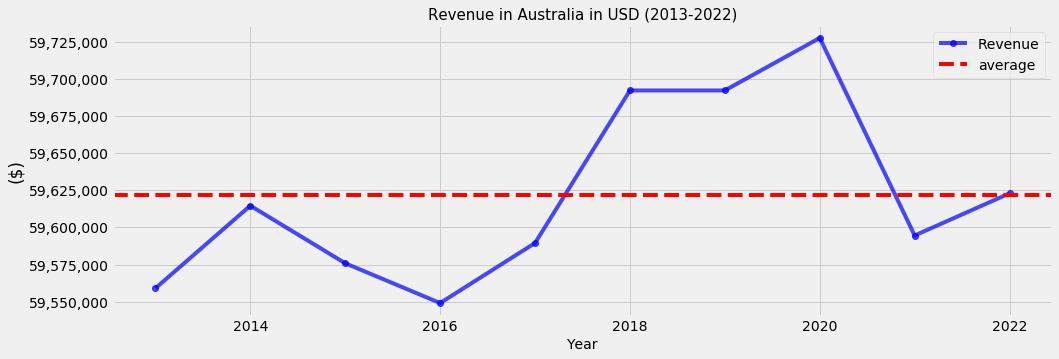

In [14]:
#Format dataFrame (keep only neccessary columns)
df_cleaned.drop(columns = ["sales", "price", "country", "Category"], inplace = True)
df_cleaned.rename(columns = {'revenue':'Revenue','Sales_new':'Sales_volume'\
                                               ,'Price_new':'Price','year':'Year'}, inplace = True)
df_cleaned.reset_index(inplace = True, drop = True)

#Calculate revenue for Australia
df_cleaned['Revenue'] = df_cleaned['Sales_volume']*df_cleaned['Price']
df_Au = df_cleaned.query('Country == "Australia"').set_index('Year').Revenue

#Plotting
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,5))
df_Au.plot(ax =ax, style = 'bo-', alpha = 0.7)
ax.set_title('Revenue in Australia in USD (2013-2022)', fontsize = 15)
#Create horizontal line for average annual revenue
ax.axhline(df_Au.mean(), color ='r', linestyle ='--', label = 'average')
ax.legend()
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('($)')

#Format y-axis using (,) as thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()